# **Data Cleaning Notebook**

## Objectives
- Evaluate missing data
- Clean data by converting data types, reduces the influence of extreme outliners, log transformation and box-cox / Yeo-Johnson transformation

## Inputs
- outputs/data_collection/house_price_data.csv

## Outputs
- Generate Dataset: outputs/cleaning/house_prive_data_cleaned.csv

## Conclusion
- Data cleaning pipeline
- Drop Variables: ['EnclosedPorch', 'WoodDeckSF', 'BsmtFinType1', 'LotArea', 'BsmtUnfSF', 'BedroomAbvGr', 'BsmtExposure', 'OverallCond']


---

## Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/ci-c5-housing-market-prices/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/ci-c5-housing-market-prices'

---

## Get data

Load collected and analysed data from outputs/collection.

In [4]:
import pandas as pd
df_raw_path = "outputs/data_collected/house_pricing_data.csv"
df = pd.read_csv(df_raw_path)
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

## Data Cleaning

### Handling Missing Values

- Drop columns with a very high percentage of missing values (e.g., EnclosedPorch, WoodDeckSF)
- Impute missing values for columns with moderate missing data:
  - Numeric columns (e.g., 2ndFlrSF, BedroomAbvGr) using the mean, median, or mode.
  - Categorical columns (e.g., BsmtExposure, BsmtFinType1) using the mode (most frequent value).
-  For small missing data counts (e.g., MasVnrArea), impute with the mean or median.

#### The following varibales will be dropped because the number of missing values is too high

In addition, a former correlation analysis showed that both values have a very low correlation with the sales price.

In [ ]:
df = df.drop(columns=['EnclosedPorch', 'WoodDeckSF'])

#### Impute missing values

In [6]:
# numeric columns:
df['2ndFlrSF'] = df['2ndFlrSF'].fillna(df['2ndFlrSF'].median())
df['BedroomAbvGr'] = df['BedroomAbvGr'].fillna(df['BedroomAbvGr'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [7]:
# categorical columns
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])


In [ ]:
#small number of missing values
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

### Handling Duplicates (no duplicates has been found)

### Dealing with Incorrect Data Types

In the data inspectation the conclusion was that ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'] have the wrong data type. Here it is adjusted.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Convert the columns to string type (it will handle NaN as 'nan' string)
df['BsmtExposure'] = df['BsmtExposure'].astype(str)
df['BsmtFinType1'] = df['BsmtFinType1'].astype(str)
df['GarageFinish'] = df['GarageFinish'].astype(str)
df['KitchenQual'] = df['KitchenQual'].astype(str)

# Step 2: Strip any leading/trailing whitespace from the column values
df['BsmtExposure'] = df['BsmtExposure'].str.strip()
df['BsmtFinType1'] = df['BsmtFinType1'].str.strip()
df['GarageFinish'] = df['GarageFinish'].str.strip()
df['KitchenQual'] = df['KitchenQual'].str.strip()

# Step 3: Replace string representation of 'NaN' with 'Unknown'
df['BsmtExposure'] = df['BsmtExposure'].replace("nan", "Unknown")
df['BsmtFinType1'] = df['BsmtFinType1'].replace("nan", "Unknown")
df['GarageFinish'] = df['GarageFinish'].replace("nan", "Unknown")
df['KitchenQual'] = df['KitchenQual'].replace("nan", "Unknown")

# Step 4: Map categorical values to numeric
df['BsmtExposure'] = df['BsmtExposure'].replace({
    "No": 0,
    "Gd": 1,
    "Mn": 2,
    "Av": 3,
    "Ex": 4,
    "Unknown": np.nan  # Replace 'Unknown' with NaN for numerical operations
})

df['BsmtFinType1'] = df['BsmtFinType1'].replace({
    "GLQ": 6,  # Good Living Quarters
    "ALQ": 5,  # Average Living Quarters
    "BLQ": 4,  # Below Average Living Quarters
    "Rec": 3,  # Average Rec Room
    "LwQ": 2,  # Low Quality
    "Unf": 1,  # Unfinished
    "None": 0  # No Basement
})

df['GarageFinish'] = df['GarageFinish'].replace({
    "Fin": 3,  # Finished
    "RFn": 2,  # Rough Finished
    "Unf": 1,  # Unfinished
    "None": 0  # No Garage
})

df['KitchenQual'] = df['KitchenQual'].replace({
    "Ex": 4,  # Excellent
    "Gd": 3,  # Good
    "TA": 2,  # Typical/Average
    "Fa": 1,  # Fair
    "Po": 0   # Poor
})


# Step 5: Check the unique values to confirm that the columns contain only valid values
print("Unique values in BsmtExposure:", df['BsmtExposure'].unique())
print("Unique values in BsmtFinType1:", df['BsmtFinType1'].unique())
print("Unique values in GarageFinish:", df['GarageFinish'].unique())
print("Unique values in KitchenQual:", df['KitchenQual'].unique())

# Step 6: Apply numeric conversion safely (handle non-numeric values)
df['BsmtExposure'] = pd.to_numeric(df['BsmtExposure'], errors='coerce')
df['BsmtFinType1'] = pd.to_numeric(df['BsmtFinType1'], errors='coerce')
df['GarageFinish'] = pd.to_numeric(df['GarageFinish'], errors='coerce')
df['KitchenQual'] = pd.to_numeric(df['KitchenQual'], errors='coerce')

# Step 7: Check the first few rows to ensure the transformation worked
print(df.head())

Unique values in BsmtExposure: [0 1 2 3]
Unique values in BsmtFinType1: [6 5 1 3 4 2]
Unique values in GarageFinish: [2 1 3]
Unique values in KitchenQual: [3 2 4 1]
   1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0       856     854.0           3.0             0         706             6   
1      1262       0.0           3.0             1         978             5   
2       920     866.0           3.0             2         486             6   
3       961       0.0           3.0             0         216             5   
4      1145       0.0           4.0             3         655             6   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0        150         548             2       2003.0  ...     8450   
1        284         460             2       1976.0  ...     9600   
2        434         608             2       2001.0  ...    11250   
3        540         642             1       1998.0  ...     9550   
4        490   

### Correcting Outliers (not relevant)

### Correlation analysis

To get an understand how the parameters correalate with the sales price the following analsis is used.

In [11]:
correlation_matrix = df.corr()
print(correlation_matrix)

              1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  \
1stFlrSF      1.000000 -0.184843      0.119940      0.173183    0.445863   
2ndFlrSF     -0.184843  1.000000      0.464390     -0.083267   -0.130006   
BedroomAbvGr  0.119940  0.464390      1.000000     -0.079703   -0.097376   
BsmtExposure  0.173183 -0.083267     -0.079703      1.000000    0.190755   
BsmtFinSF1    0.445863 -0.130006     -0.097376      0.190755    1.000000   
BsmtFinType1  0.187162 -0.113784     -0.119700      0.217813    0.631545   
BsmtUnfSF     0.317987  0.007539      0.149465     -0.010583   -0.495251   
GarageArea    0.489782  0.131849      0.056942      0.201905    0.296970   
GarageFinish  0.267402  0.149024     -0.003288      0.150629    0.195727   
GarageYrBlt   0.224897  0.056154     -0.047435      0.220879    0.148782   
GrLivArea     0.566024  0.668139      0.497586      0.043662    0.208171   
KitchenQual   0.387027  0.158481     -0.011632      0.209067    0.228415   
LotArea     

Correlation with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.466754
GarageFinish    0.465039
BsmtFinSF1      0.386420
LotFrontage     0.334771
OpenPorchSF     0.315856
2ndFlrSF        0.312479
LotArea         0.263843
BsmtFinType1    0.261373
BsmtExposure    0.229632
BsmtUnfSF       0.214479
BedroomAbvGr    0.155784
OverallCond    -0.077856
Name: SalePrice, dtype: float64


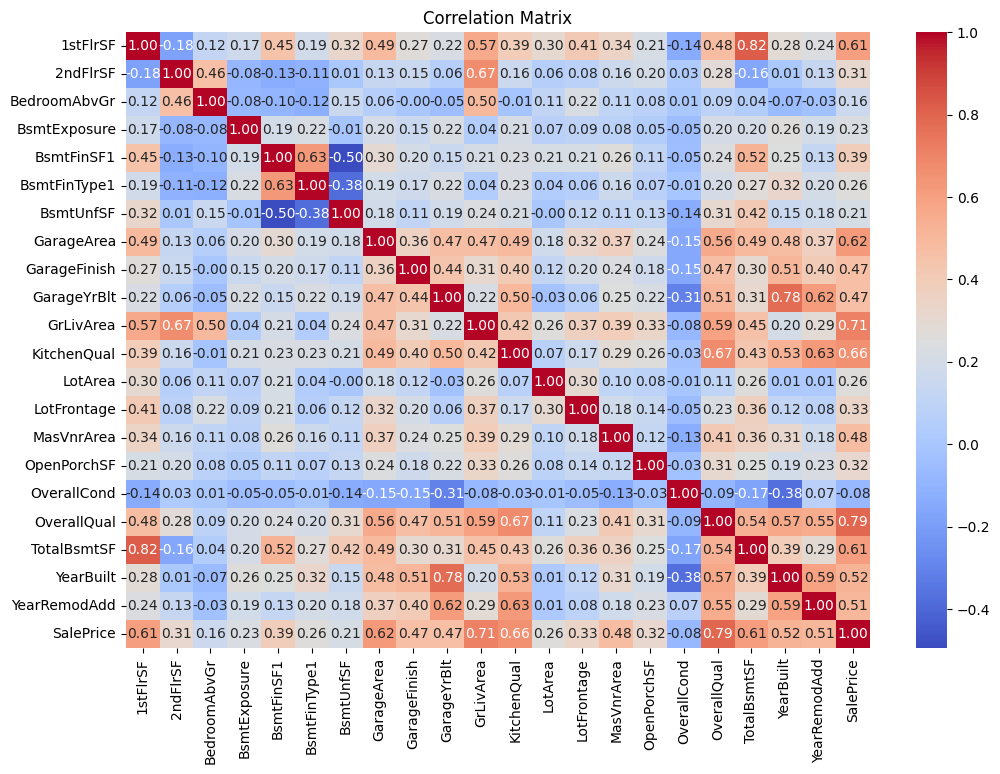

In [12]:
correlation_matrix = df.corr()

# Focus on the correlation with 'SalePrice'
print("Correlation with SalePrice:")
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)

# Optionally, you can plot the correlation matrix using seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#### Results of the correlation analysis

The following parameters have the biggest impact on the sales price:

#### High Correlation: Correlation coefficient >0.7

- OverallQual      0.790982
- GrLivArea        0.708624


#### Medium Correlation: Correlation coefficient [0.3,0.7]

- KitchenQual      0.659600
- GarageArea       0.623431
- TotalBsmtSF      0.613581
- 1stFlrSF         0.605852
- YearBuilt        0.522897
- YearRemodAdd     0.507101
- MasVnrArea       0.477493
- GarageYrBlt      0.466754
- GarageFinish     0.465039
- BsmtFinSF1       0.386420
- LotFrontage      0.334771
- OpenPorchSF      0.315856
- 2ndFlrSF         0.312479



#### Low Correlation: Correlation coefficient <0.3

- LotArea          0.263843
- BsmtFinType1     0.261373
- BsmtExposure     0.229632
- BsmtUnfSF        0.214479
- BedroomAbvGr     0.155784
- OverallCond     -0.077856

The following varibales will be dropped because the corrlation values are low and irrelevant for the further process.

In [13]:
df = df.drop(columns=['BsmtFinType1', 'LotArea', 'BsmtUnfSF', 'BsmtFinSF1', 'LotFrontage'])

'BsmtExposure', 'BedroomAbvGr', '2ndFlrSF' and 'OverallCond' are kept for further analysis in notebook '02b_house_market_study'.

In [14]:
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,0,548,2,2003.0,1710,3,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,1,460,2,1976.0,1262,2,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,608,2,2001.0,1786,3,162.0,42,5,7,920,2001,2002,223500


## Data Cleaning summary

Find here the data cleaning approaches:

- Drop the following parameters because those have a low impact on the sales price 
['BsmtFinType1', 'LotArea', 'WoodDeckSF', 'BsmtUnfSF', 'BedroomAbvGr', 'BsmtExposure', 'OverallCond', 'EnclosedPorch']

- Drop variables with more then 80% of missing data since these varables wil likely not add much value
['WoodDeckSF', 'EnclosedPorch']

## Push cleaned data to Repo

In [15]:
import os
try:
  os.makedirs(name='outputs/data_cleaned') # create outputs/data_cleaned folder
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/data_cleaned'


### Save cleaned data

In [16]:
df.to_csv(f"outputs/data_cleaned/house_market_data_complete_cleaned.csv",index=False)

In [17]:
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,0,548,2,2003.0,1710,3,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,1,460,2,1976.0,1262,2,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,608,2,2001.0,1786,3,162.0,42,5,7,920,2001,2002,223500


### Drop further values after insights of house market study

In [18]:
df = df.drop(columns=['OpenPorchSF', 'BsmtExposure', 'BedroomAbvGr', 'OverallCond'])

### Create Test and Train data
Splitting Data: Typically, you split your dataset into train and test sets. For instance:

`A common split is 70% for training and 30% for testing (though this can vary based on the problem and dataset size).

In [19]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
TrainSet, TestSet = train_test_split(df, test_size=0.3, random_state=42)

### Train Set

In [20]:
import pandas as pd
import os

# Ensure output directory exists
os.makedirs("outputs/data_cleaned", exist_ok=True)

# Save the DataFrame to CSV
TrainSet.to_csv("outputs/data_cleaned/TrainSet.csv", index=False)

print(TrainSet.head(10))  # Display the first 10 rows

      1stFlrSF  2ndFlrSF  GarageArea  GarageFinish  GarageYrBlt  GrLivArea  \
135       1682       0.0         530             1       1970.0       1682   
1452      1072       0.0         525             3       2005.0       1072   
762        764     783.0         614             1       2009.0       1547   
932       1905       0.0         788             3       2006.0       1905   
435        827     834.0         550             2       1996.0       1661   
629       1350       0.0         520             2       1964.0       1350   
1210      1055     790.0         462             2       1992.0       1845   
1118      1021     580.0         300             2       1958.0       1601   
1084       691     807.0         409             3       1995.0       1498   
158        991     956.0         678             2       2004.0       1947   

      KitchenQual  MasVnrArea  OverallQual  TotalBsmtSF  YearBuilt  \
135             2       288.0            7         1304       1970   
1

### Test Set

In [21]:
import pandas as pd
import os

# Ensure output directory exists
os.makedirs("outputs/data_cleaned", exist_ok=True)

# Save the DataFrame to CSV
TestSet.to_csv("outputs/data_cleaned/TestSet.csv", index=False)

print(TestSet.head(10))  # Display the first 10 rows

      1stFlrSF  2ndFlrSF  GarageArea  GarageFinish  GarageYrBlt  GrLivArea  \
892       1068       0.0         264             2       1963.0       1068   
1105      1500       0.0         712             2       1994.0       2622   
413       1028       0.0         360             1       1927.0       1028   
522       1004       0.0         420             1       1950.0       1664   
1036      1620       0.0         912             3       2008.0       1620   
614        630       0.0           0             1       1980.0        630   
218       1137     817.0         431             1       1939.0       1954   
1160       855     601.0         440             1       1978.0       1456   
649        630       0.0           0             1       1980.0        630   
887        872     521.0         300             1       1955.0       1393   

      KitchenQual  MasVnrArea  OverallQual  TotalBsmtSF  YearBuilt  \
892             2         0.0            6         1059       1963   
1